In [1]:
import os
import copy
import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.io
import matplotlib.pyplot as plt
import glob
import re
from datetime import datetime
from dateutil import parser
import dateutil.parser
from scipy.io import savemat

import numpy as np
import scipy.misc
import numpy.random as rng
from PIL import Image, ImageDraw, ImageFont
from sklearn.utils import shuffle
import nibabel as nib #reading MR images
import math
from matplotlib import pyplot as plt

In [2]:
import shap
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

In [2]:
DATASET = 'Dataset_Ciaran_McEvoy.csv'
dataset = pd.read_csv(DATASET)

dataset.replace('M', 1, inplace=True)
dataset.replace('F', 0, inplace=True)
X = dataset.drop(columns=['Left-Hippocampus', 'VISCODE','VISCODE2', 'Group', 'MRI_Date', 'Exam_Date'])
y = dataset['Left-Hippocampus']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

output_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nActual vs Predicted:")
print(output_df)

Mean Squared Error: 62044.657536460756

Actual vs Predicted:
      Actual  Predicted
56    2373.0   2162.178
194   2448.0   2267.071
2225  3353.4   3751.056
233   3002.0   2925.155
1902  2242.0   2215.246
...      ...        ...
2296  3878.5   3732.161
1127  3006.0   3113.545
2456  3541.9   3725.742
1915  4280.0   4242.540
841   4096.0   4073.743

[510 rows x 2 columns]


In [8]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

DATASET = 'Dataset_Ciaran_McEvoy.csv'
dataset = pd.read_csv(DATASET)

dataset.replace('M', 1, inplace=True)
dataset.replace('F', 0, inplace=True)
X = dataset.drop(columns=['VISCODE','VISCODE2', 'Group', 'MRI_Date', 'Exam_Date'])
y = dataset['Group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
output_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nActual vs Predicted:")
print(output_df)

Accuracy: 0.6352941176470588

Actual vs Predicted:
     Actual Predicted
56      MCI       MCI
194      AD        AD
2225     CN        CN
233     MCI       MCI
1902     AD       MCI
...     ...       ...
2296     CN        CN
1127     AD       MCI
2456   LMCI        CN
1915     CN       MCI
841      CN        CN

[510 rows x 2 columns]


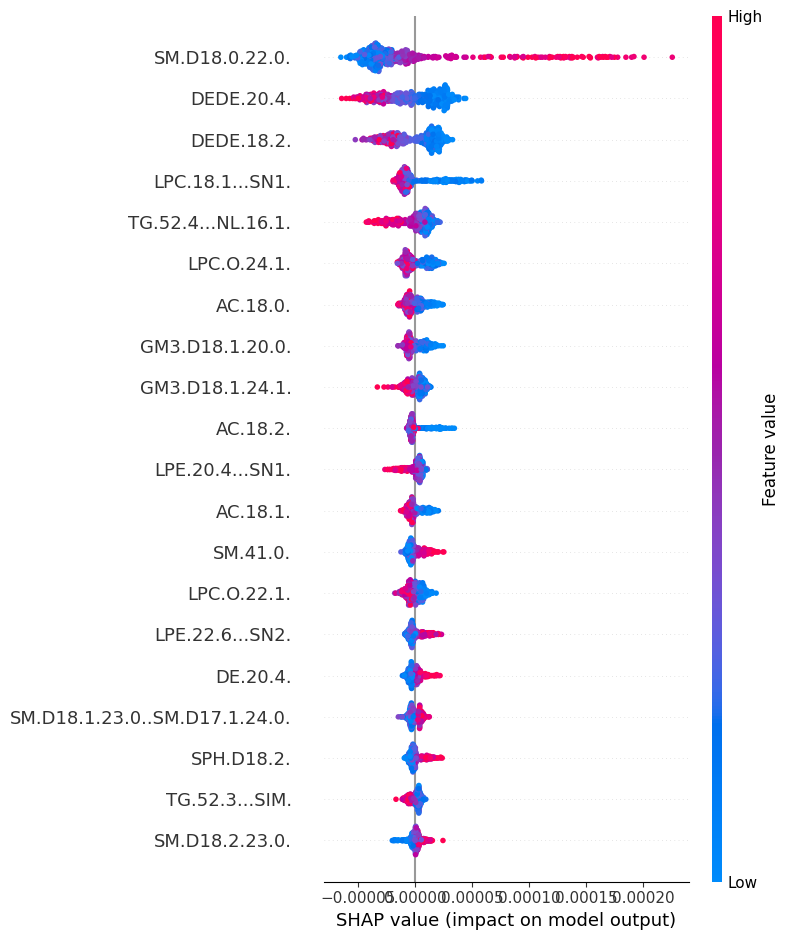

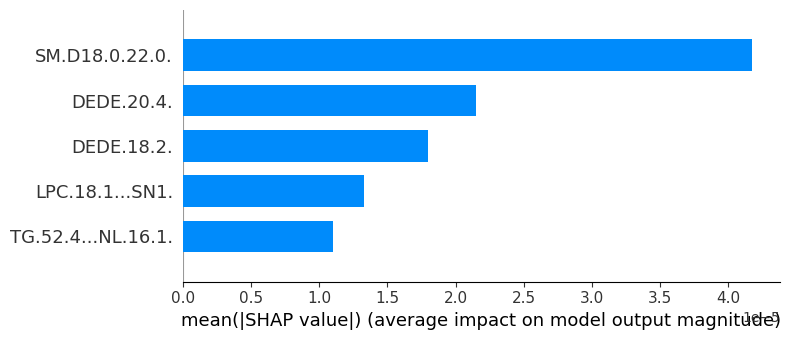

In [3]:
DATASET = 'Dataset3.0.csv'
dataset = pd.read_csv(DATASET)
dataset['Sex'] = dataset['Sex'].replace({'M': 1, 'F': 0})
lipids_only = dataset.iloc[:, 54:837]
columns_to_drop = ['LHC_ICV', 'RHC_ICV']
X = lipids_only.drop(columns=columns_to_drop, axis=1)
y = lipids_only['LHC_ICV']

# Assuming 'X' and 'y' are defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

# Plot the top 5 features based on mean absolute SHAP values
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns, plot_type="bar", max_display=5)